<a href="https://colab.research.google.com/github/Anaqqa/4DVST---Data-Visualization/blob/main/TP_4DVST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation des biblitothèquess nécessaires

In [23]:
!pip install matplotlib seaborn plotly

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Import des données

In [25]:
# Importer le fichier CSV avec pandas
df = pd.read_csv('/content/sample_data/mobile_phones_2000.csv')

Desctiption des data

In [22]:
print("Nombre de lignes :", df.shape[0])

Nombre de lignes : 2000


In [20]:
df.info() #résumé du dataframe pour mieuux comprendre la structure des données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 2000 non-null   object 
 1   Model                 2000 non-null   object 
 2   Price (USD)           2000 non-null   float64
 3   Selling Platform      2000 non-null   object 
 4   Rating                2000 non-null   float64
 5   Refresh Rate (Hz)     2000 non-null   int64  
 6   Screen Size (inches)  2000 non-null   float64
 7   RAM (GB)              2000 non-null   int64  
 8   Storage (GB)          2000 non-null   int64  
 9   Processor             2000 non-null   object 
 10  Camera Setup          2000 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 172.0+ KB


In [26]:
# Afficher les 5 premières lignes du DataFrame pour vérifier qu'il a été importé correctement
df.head()

,Brand,Model,Price (USD),Selling Platform,Rating,Refresh Rate (Hz),Screen Size (inches),RAM (GB),Storage (GB),Processor,Camera Setup
0,OnePlus,Narzo Edge 16,1286.64,Best Buy,3.5,165,7.2,16,128,Snapdragon 8+ Gen 1,12MP + 16MP + 5MP
1,Sony,Pixel Max 24,728.52,eBay,4.6,90,6.1,4,64,Dimensity 920,48MP + 8MP + 5MP
2,Samsung,Reno Plus 23,1086.68,Official Store,3.4,60,6.2,12,64,Exynos 2200,200MP + 12MP + 8MP
3,Apple,Redmi Note Mini 16,1158.78,Official Store,3.5,120,7.1,6,128,A16 Bionic,50MP + 50MP + 2MP
4,Vivo,P Series Edge 13,1656.05,Reliance Digital,4.9,165,6.1,8,512,Helio G99,64MP + 50MP + 8MP


In [17]:
df.describe() #Statistiques descriptives des colonnes numériques

,Price (USD),Rating,Refresh Rate (Hz),Screen Size (inches),RAM (GB),Storage (GB)
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1085.496980,3.99005,116.086500,6.268250,9.171000,378.304000
std,526.886705,0.57630,37.199596,0.734974,4.400505,339.345696
min,151.930000,3.00000,60.000000,5.000000,4.000000,64.000000
25%,644.187500,3.50000,90.000000,5.600000,6.000000,128.000000
50%,1081.455000,4.00000,120.000000,6.300000,8.000000,256.000000
75%,1546.532500,4.50000,144.000000,6.900000,12.000000,512.000000
max,1999.260000,5.00000,165.000000,7.500000,16.000000,1024.000000


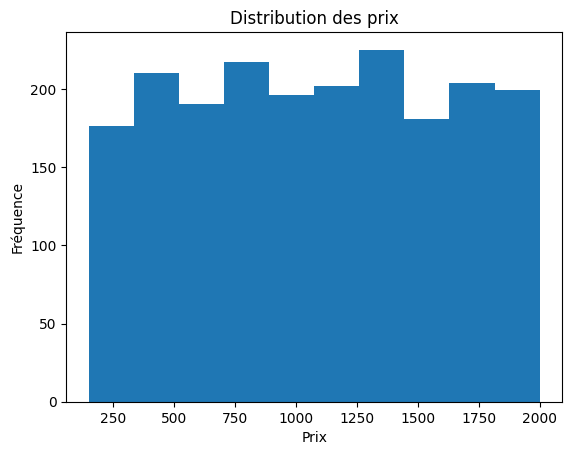

In [28]:
plt.hist(df['Price (USD)'], bins=10)
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Distribution des prix')
plt.show()

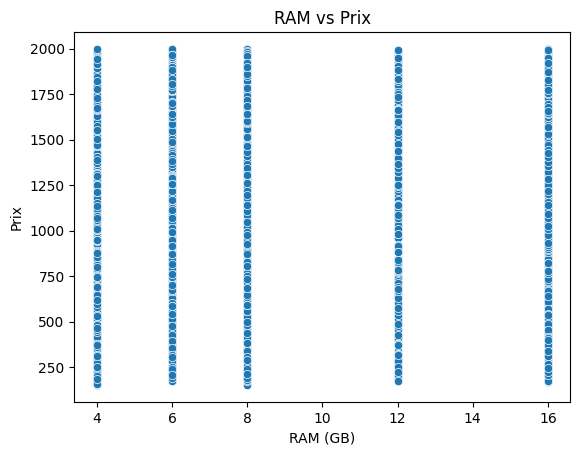

In [32]:
sns.scatterplot(x='RAM (GB)', y='Price (USD)', data=df)
plt.xlabel('RAM (GB)')
plt.ylabel('Prix')
plt.title('RAM vs Prix')
plt.show()

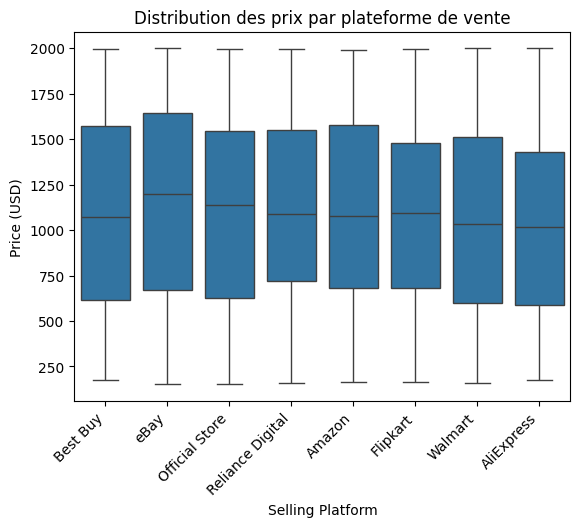

In [33]:
sns.boxplot(x='Selling Platform', y='Price (USD)', data=df)
plt.title('Distribution des prix par plateforme de vente')
plt.xticks(rotation=45, ha='right')
plt.show()

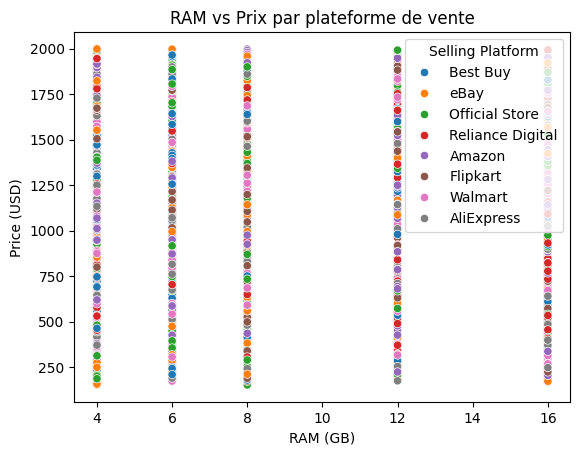

In [34]:
sns.scatterplot(x='RAM (GB)', y='Price (USD)', hue='Selling Platform', data=df)
plt.title('RAM vs Prix par plateforme de vente')
plt.show()

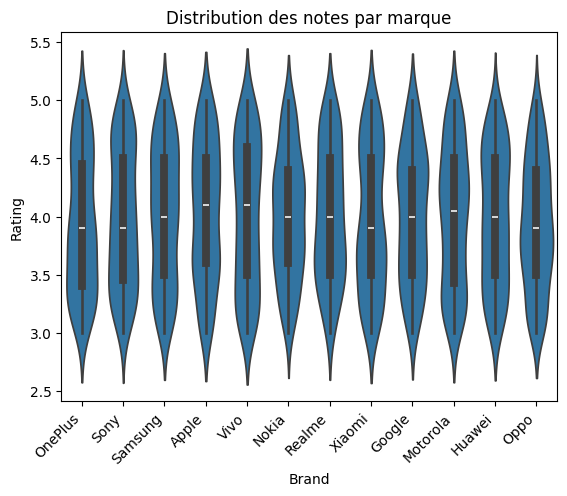

In [35]:
sns.violinplot(x='Brand', y='Rating', data=df)
plt.title('Distribution des notes par marque')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
fig = px.bar(df.groupby('Brand')['Price (USD)'].mean().reset_index(),
             x='Brand', y='Price (USD)', title='Prix moyen par marque')
fig.update_xaxes(tickangle=45, tickmode='linear')
fig.show()

In [39]:
fig = px.scatter(df, x='Screen Size (inches)', y='Price (USD)',
                 size='RAM (GB)', color='Brand',
                 title='Taille Ecran vs Prix, avec RAM comme taille des points',
                 hover_data=['Model'])  # Ajoute le nom du modèle au survol
fig.show()